# Задача №2

🤔 <font color='brown'> Стандарты технического аудита содержат пул рекомендаций по настройке и
проверке конфигураций информационных систем с целью повышения их
безопасности (Hardening).
Для автоматизации выполнения проверок конфигураций на соответствие
стандарту необходимо подобрать набор команд, выполняемый на конечных
устройствах (например, на рабочей станции).
В рамках данной части задания необходимо: </font>

- <font color='brown'> Провести анализ документа CIS Microsoft Windows 11 Enterprise. </font>
- <font color='brown'> Приоритизировать проверки и выбрать на ваш взгляд 10 самых 
критичных. </font>
- <font color='brown'> Описать эти критерии своими словами: за что они отвечают и почему
важны. </font>
- <font color='brown'> Для каждой из 10-ти выбранных проверок подобрать или составить
команду(-ы) для выполнения в командной строке (cmd и/ или
PowerShell), которая(-ые) будут помогать в проверки на соответствие
стандарту. </font>

### 1️⃣ 1.1.5 (L1) Ensure 'Password must meet complexity requirements' is set to 'Enabled' (Automated) 

Проверка включает соблюдение требованиям для сложных паролей:

- Не содержит имени УЗ пользователя или частей полного имени пользователя, превышающих
двух последовательных символов
- Длина не менее шести символов
- Содержит символы из двух следующих категорий:
    - Английские символы (от A до Z) и (от a до z)
    - Цифры (от 0 до 9)
- Специальные символы (например, !, $, #, %)
- Общая категория, включающая любые символы Юникода, которые не подпадают под
предыдущие четыре категории.

**Важна** для предотвращения атак перебором пароля (брутфорс).

```powershell
PS C:\Windows\system32> secedit /export /areas SECURITYPOLICY /cfg C:\Temp\pol.txt; Select-String -Path C:\Temp\pol.txt -Pattern "PasswordComplexity"
```

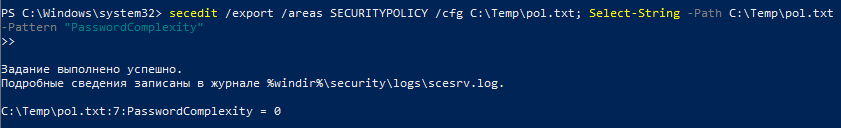

❌ Требования сложности паролей отключены

### 2️⃣ 1.1.4 (L1) Ensure 'Minimum password length' is set to '14 or more character(s)' (Automated)

Проверка включает соблюдение требований для длинны пароля - от 14 символов или больше

**Важна** для предотвращения атак перебором пароля (брутфорс).

```powershell
net accounts 
```

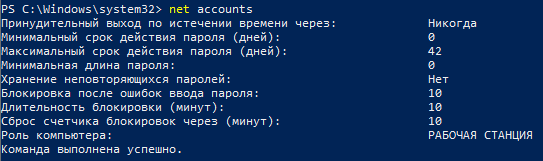

❌ Минимальная длина пароля: 0

### 3️⃣ 1.1.1 (L1) Ensure 'Enforce password history' is set to '24 or more password(s)' (Automated)

Проверка включает соблюдение требованиям о сохранении истории использования предыдущих паролей и запрета их использовать, пока, они из  этой истории не пропадут. То есть, пользователь не сможет поставить тот же пароль, какой использовал раньше. В истории должно хранится минимум 24 пароля.

**Важна** для того, чтобы пользователь не мог чередовать предыдущие свои пароли, а установить новый.

```powershell
net accounts 
```

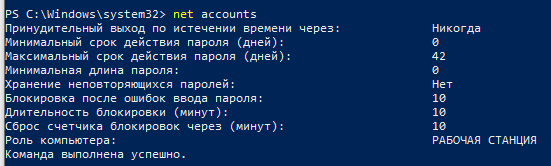

❌ Хранение неповторяющихся паролей: Нет

### 4️⃣ 1.2.2 (L1) Ensure 'Account lockout threshold' is set to '5 or fewer invalid logon attempt(s), but not 0' (Automated)

Проверка включает соблюдение требованиям для установления максимального количество попыток входа в систему. При достижении этого количества, пользователь будет заблокирован на определнное количество времени, которое тоже задается политикой безопасности. Для прохождение проверки, необходимо максимум 5 попыток входа.

**Важна** для предотвращения атак перебором пароля (брутфорс).

```powershell
net accounts 
```

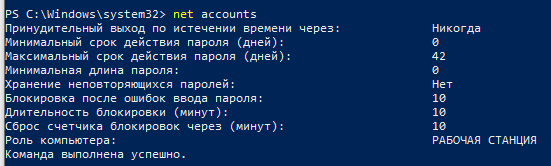

❌ Блокировка после ошибок ввода пароля: 10

### 5️⃣ 5.24 (L2) Ensure 'Remote Registry (RemoteRegistry)' is set to 'Disabled' (Automated)

Проверка включает соблюдение требованиям отключения «Remote Registry», которая предоставляет возможность удаленно просматривать и изменять реестр винды.

**Важна**, чтобы предотварить удаленный доступ к компьютеру и изменения реестра.

```powershell
Get-Service RemoteRegistry | Select-Object Name, Status, StartType
```

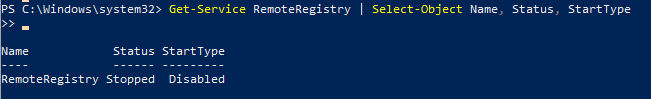

✅ Служба удалённого реестра (Remote Registry) остановлена (также допустим статус: отключено)

### 6️⃣ 2.3.1.2 (L1) Ensure 'Accounts: Guest account status' is set to 'Disabled' (Automated)

Проверка включает соблюдение требованиям об отключении встроенной учетной записи "Гостя".

**Важно** для предотвращения несанционнированого доступа в систему, т.к. зачастую УЗ Гостя не имеет пароля (или содержит какой-то общий).

```powershell
Get-LocalUser -Name "Гость" | Select Name, Enabled
```

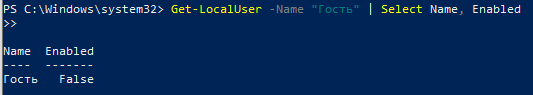

✅ УЗ отключена

### 7️⃣ 2.3.11.7 (L1) Ensure 'Network security: LAN Manager authentication level' is set to 'Send NTLMv2 response only. Refuse LM & NTLM' (Automated)

Проверка включает соблюдение требованиям об использовании только протокола аутентификации - NTLMv2. 

**Важно:**  предыдущие проктолы (LM и NTLMv1) считаются небезопасными и приводят к взлому хэшэй или перехвату данных.

```powershell
Get-ItemProperty -Path "HKLM:\SYSTEM\CurrentControlSet\Control\Lsa" -Name "LmCompatibilityLevel"
```

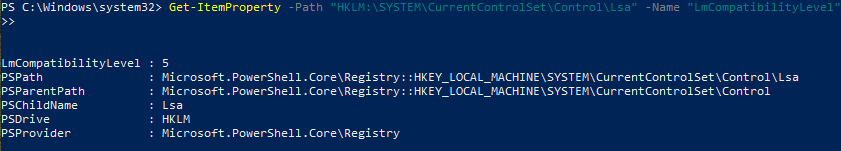

✅ LmCompatibilityLevel: 5 - используется только NTLMv2

### 8️⃣ 18.10.42.17 (L1) Ensure 'Turn off Microsoft Defender AntiVirus' is set to 'Disabled' (Automated)

Проверка включает соблюдение требованиям, что Microsoft Defender AntiVirus не будет отключен.

**Важно:** использование даже встроенного антивируса, сильно повышает безопасность системы и предотвращает будущие возможные атаки.

```powershell
Get-MpComputerStatus | Select-Object AMServiceEnabled,AntivirusEnabled,RealTimeProtectionEnabled
```

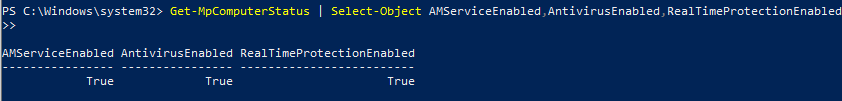

✅ Все значения - True, значи Microsoft Defender AntiVirus работает корректно

### 9️⃣ 2.3.17.7 (L1) Ensure 'User Account Control: Switch to the secure desktop when prompting for elevation' is set to 'Enabled' (Automated)

Проверка включает соблюдение требованиям, что при запрсе на повышения прав, экран временно затемняется и поверх него появляется отдельный экран.

**Важно** для защиты атак по перехвату данных.

```powershell
Get-ItemProperty -Path "HKLM:\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System" -Name PromptOnSecureDesktop
```

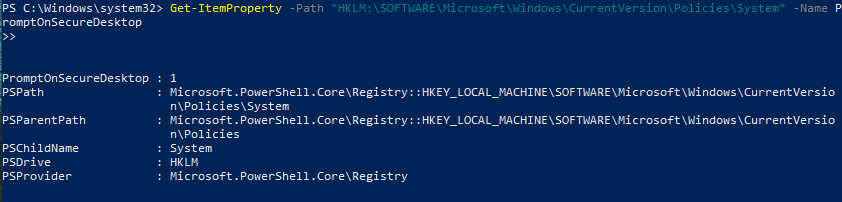

✅ PromptOnSecureDesktop = 1

### 🔟 1.1.7 (L1) Ensure 'Store passwords using reversible encryption' is set to 'Disabled' (Automated)

Проверка включает соблюдение требованиям, будут ли пароли хранится с использованием обратимого шифрования.

**Важно:** включение данной функции существенно повышает возможность компрометации паролей.

```powershell
secedit /export /areas SECURITYPOLICY /cfg C:\Temp\pol.txt; Select-String -Path C:\Temp\pol.txt -Pattern "ClearTextPassword"
```

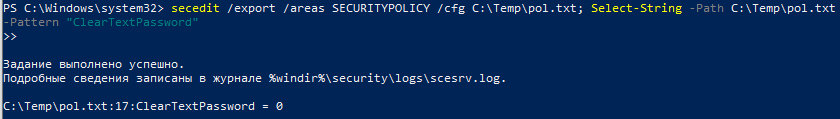

✅ ClearTextPassword = 0